<a href="https://colab.research.google.com/github/ico1036/QNN/blob/master/Multi_armed_sample_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sample average vs Constant Average  
Jiwoong Kim (2019324669)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ACTION = 10
ALPHA = 0.1
EPSILON = 0.1
S_ACTION_LIST = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
C_ACTION_LIST= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
N_selected=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [2]:
def sample_average(Q, n):
    n+=1
    reward_pdf = np.random.normal(0, 0.01, 1000)
    reward = np.random.choice(reward_pdf, 1)
    
    return Q + (1./n)*(reward - Q)

In [3]:
def constant_average(Q):
    reward_pdf = np.random.normal(0, 0.01, 1000)
    reward = np.random.choice(reward_pdf, 1)
    
    return Q + ALPHA*(reward - Q)

In [4]:
def sample_avg_reward():
    reward_list= []
    
    for step in range(10000):
        a_idx = np.argmax(S_ACTION_LIST)

        if np.random.rand(1) > EPSILON:
                # --> greedy action 
            S_ACTION_LIST[a_idx] = sample_average(S_ACTION_LIST[a_idx], N_selected[a_idx])
        else:   # --> Random action
            index = np.random.randint(10, size=1)[0]
        
            S_ACTION_LIST[index] = sample_average(S_ACTION_LIST[index], N_selected[index])
            
        reward_list.append(sum(S_ACTION_LIST) / (step+1))        
        
    return reward_list

In [5]:
def constant_avg_reward():
    reward_list=[]
    
    for step in range(10000):
        a_idx = np.argmax(C_ACTION_LIST)
       
        if np.random.rand(1) > EPSILON:
            C_ACTION_LIST[a_idx] = constant_average(C_ACTION_LIST[a_idx])
        else:
            index = np.random.randint(10, size=1)[0]
        
            C_ACTION_LIST[index] = constant_average(C_ACTION_LIST[index])
            
        reward_list.append(sum(C_ACTION_LIST) / (step+1))
        
    return reward_list

In [6]:
sample_reward=sample_avg_reward()
const_reward =constant_avg_reward()

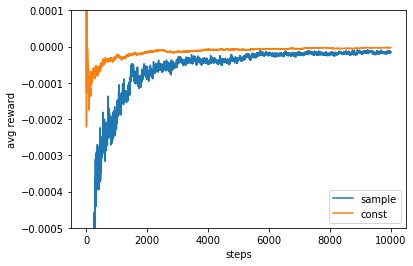

In [7]:
plt.plot(sample_reward, label='sample')
plt.plot(const_reward, label='const')
    
plt.ylim(-0.0005, 0.0001)
plt.xlabel('steps')
plt.ylabel('avg reward')
plt.legend()
    
plt.show()

In [9]:
plt.close()

Result: Constant average converges faster than constant average